# A look at female representation within different academic divisons across all academic ranks

In this notebook we want to have a look at female representation by academic area and rank. We will look at four academic areas—Arts and Sciences (A&S), Humanities (HUM), Natural Sciences (NS), and Social Sciences (SS)—and four academic ranks-Undergraduate Major and Concentrator Students (UC), Graduate Students (GS), Tenure Eligible Faculty (TE), and Tenured Faculty (TF).

Data in this notebook comes from the University Senate's [2015 report](http://senate.columbia.edu/archives/reports_archive/14-15/csw_pipeline%20report_2004-13.pdf) on the advancement of women at Columbia University (specifically pages 24-25).


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
YEARS = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]

pipeCounts = eval(open('../data/pipe_counts.txt').read())

areas = [
    ('Arts and Sciences', 'A&S'),
    ('Humanities', 'HUM'),
    ('Natural Sciences', 'NS'),
    ('Social Sciences', 'SS'),
]

ranks = [
    ('Undergraduate Major and Concentrator Students', 'UC'),
    ('Graduate Students', 'GS'),
    ('Tenure Eligible Faculty', 'TE'),
    ('Tenured Faculty', 'TF'),
]

def requestTable(area, rank, years=YEARS):
    try:
        areaName = areas[area][0]
        rankName = ranks[rank][0]
    except (IndexOutOfBoundsError, TypeError) as e:
        print('Table could not be retrieved.')
        
    df = pd.DataFrame([YEARS] + pipeCounts[areaName][rankName])
    df = df.rename({0:'Year', 1: 'Women', 2: 'Men'}).T    
    if len(years) < len(YEARS): # we specified a few years only
        df = df.loc[df['Year'].isin(years)].reset_index()
    return df

## Visualizing a female vs. male proportion plot for each academic area and rank

In the following 16 charts we visualize female representation in each academic rank of each academic area. In the vertical axis we represent the number of women, in the horizontal axis the number of men. Each axis encompasses the same range. This is so we can easily visualize a 1:1 line (which represents an equal number of men and women) and compare the proportion of women over men.

In [9]:
def plotSquare(plot, area, rank, equality=True, abbreviate=True, years=YEARS, line=True):
    labelIndex = 1 if abbreviate else 0
    plot.set_title(
        'Women vs. Men {} in {}'.format(
            ranks[rank][labelIndex], 
            areas[area][labelIndex]
        )
    )
    
    table = requestTable(area, rank, years=years)
    plotterFn = plot.plot if line else plot.scatter
    plotterFn(table['Men'], table['Women'], linestyle='--', marker='o', color='b')
    plot.set_xlabel('Number of Men')
    plot.set_ylabel('Number of Women')
    
    axMin = min(min(table['Women']), min(table['Men']))
    axMax = max(max(table['Women']), max(table['Men']))
    padding = int((axMax - axMin) * 0.1)
    axMin -= padding
    axMax += padding
    plot.axis(xmin=axMin,xmax=axMax,ymin=axMin,ymax=axMax)
    
    plot.grid('scaled', linestyle='dotted')
    
    if equality: # graph equality line
        plot.plot([axMin, axMax], [axMin, axMax], linestyle='--', marker='', color='#aaaaaa')

    for y in range(len(years)):
        plot.annotate(table['Year'][y], (table['Men'][y], table['Women'][y]))

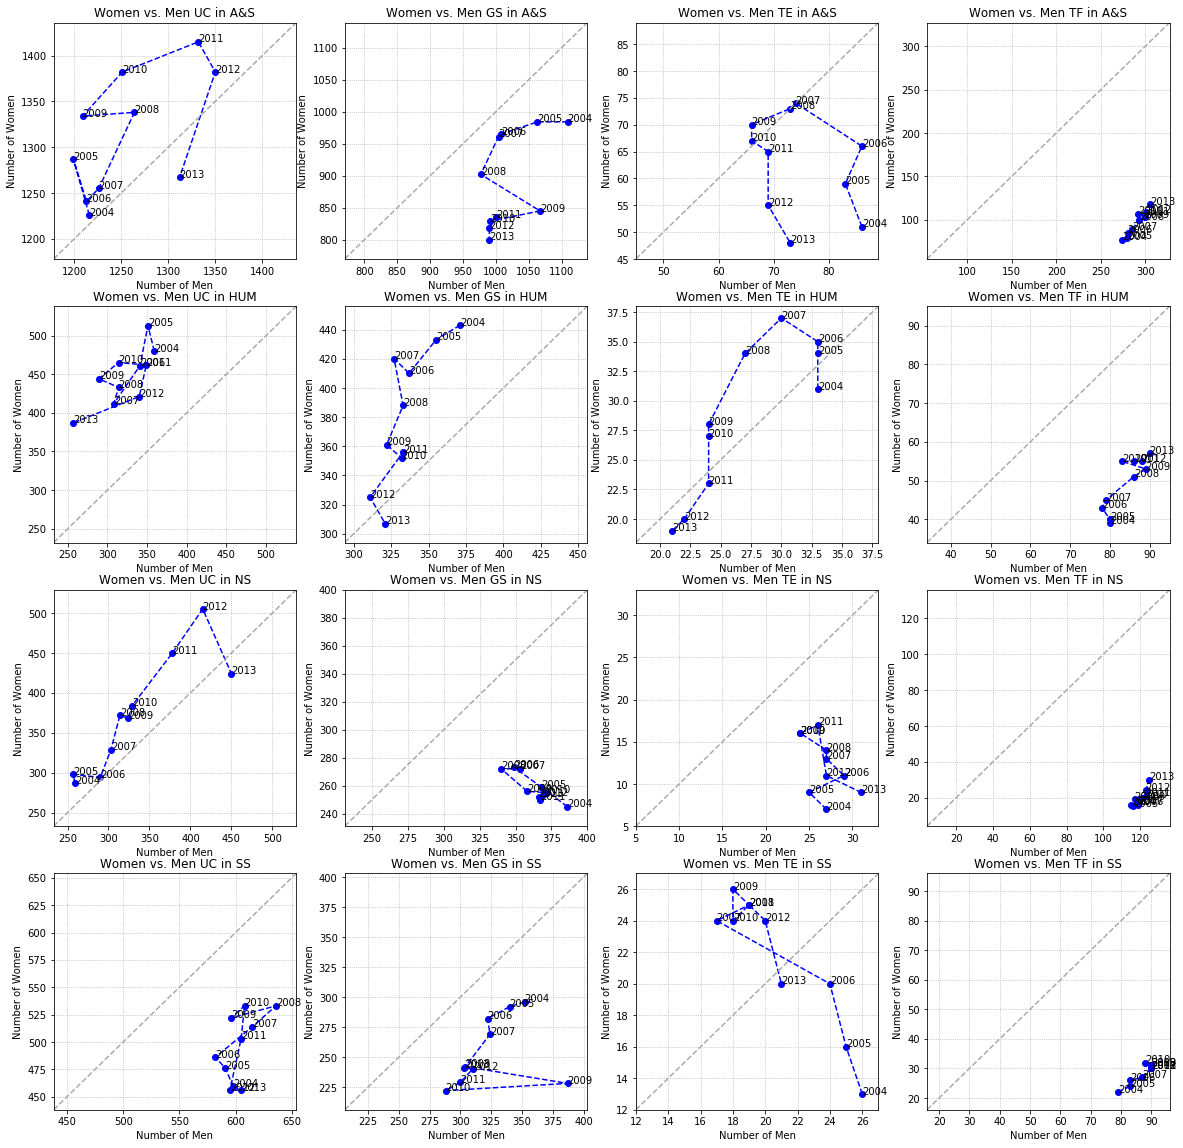

In [10]:
fig, ax_lst = plt.subplots(len(areas), len(ranks), figsize=(20,20))
for a in range(len(areas)):
    for r in range(len(ranks)):
        plotSquare(ax_lst[a, r], a, r)

We notice a striking result from the humanities charts: undergraduate students are predominantly female, but tenured faculty are predominantly male. Let's plot this one more time, side by side.

(Also notice the drop in female representation from the undergraduate to the graduate level of Natural Sciences. We will analyze this later.)

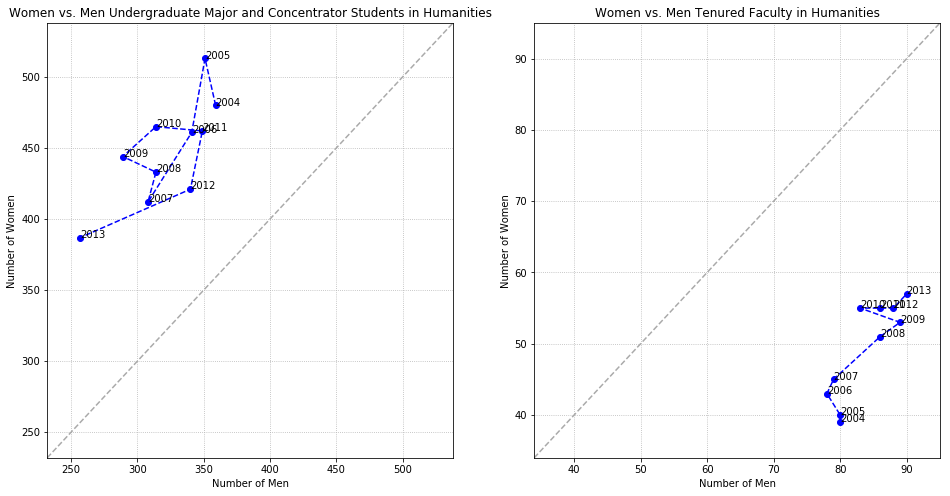

In [11]:
fig, ax_lst = plt.subplots(1, 2, figsize=(16,8))
for i in range(2):
    plotSquare(ax_lst[i], 1, i*3, equality=True, abbreviate=False)

The difference in proportion is substantial. **(Note to self: This will be the static graphic.)**

## We've looked at proportions. What about totals?

In the charts we've looked at so far, we have compared the proportion of men and women in each academic area and rank.

Let's take a look at the totals. We can simplify the charts to totals over time using a line chart, with one line representing the female headcount, and another representing the male headcount.

In [12]:
def plotLines(plot, area, rank, abbreviate=True):
    labelIndex = 1 if abbreviate else 0
    plot.set_title('Total Women vs. Men {} in {}'.format(ranks[rank][labelIndex], areas[area][labelIndex]))
    
    table = requestTable(area, rank)
    plot.plot(table['Year'], table['Men'], linestyle='-', marker='', color='b', label='Men')
    plot.plot(table['Year'], table['Women'], linestyle='-', marker='', color='g', label='Women')
    
    plot.set_xlabel('Year')
    plot.set_ylabel('Number of People')
    plot.axis(ymin=0)
    plot.legend()
    
    plot.yaxis.grid(True)

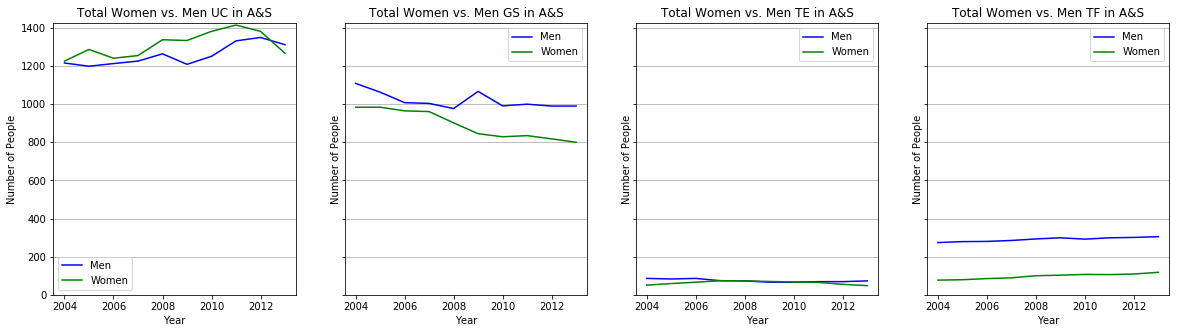

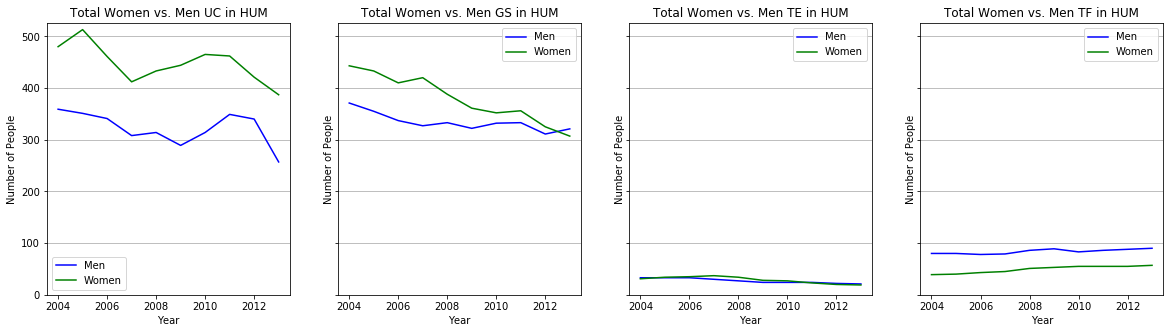

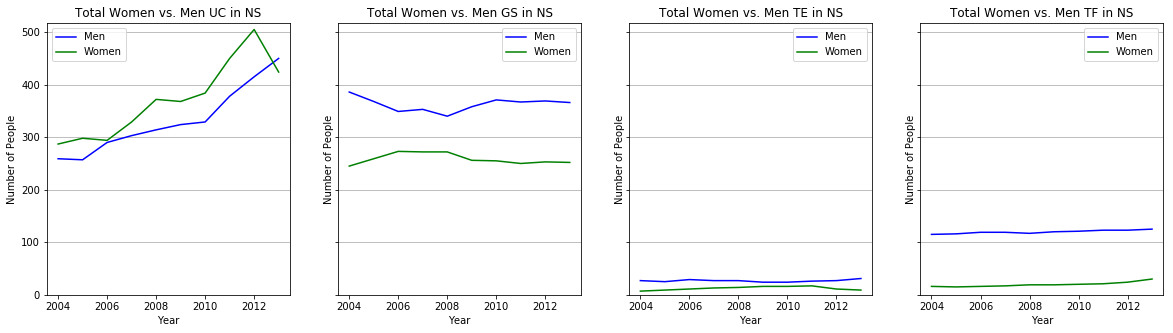

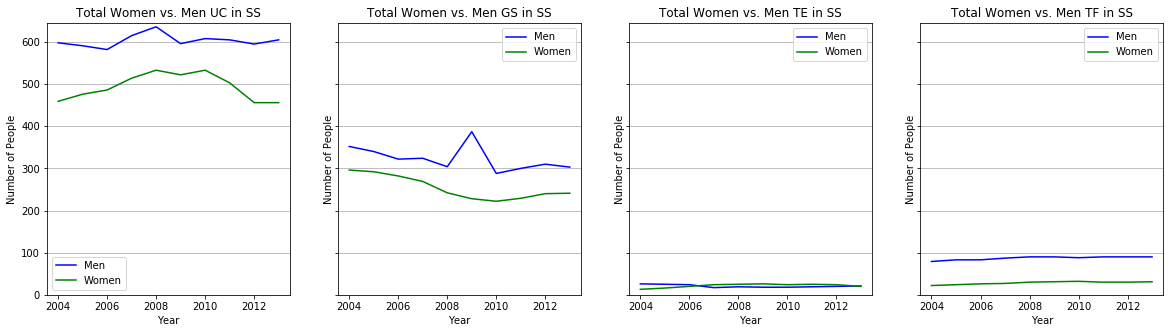

In [13]:
for a in range(len(areas)):
    fig, ax_lst = plt.subplots(1, len(ranks), figsize=(20,5), sharey=True)
    for r in range(len(ranks)):
        plotLines(ax_lst[r], a, r)

Through this type of visualization we notice large representation gaps in A&S, HUM, and NS, and a slightly smaller gap in SS, between UC and TF. (And notice how the Men and Women lines in HUM swap places between UC and TF).

Earlier we noticed a sizable drop in female representation from the undergraduate to graduate levels in Natural Sciences. Let's plot this.

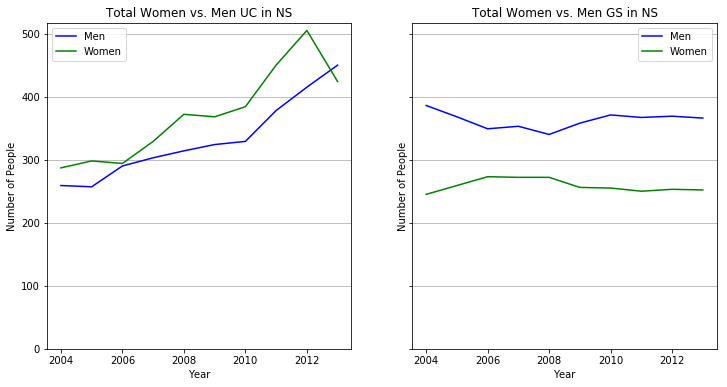

In [14]:
fig, ax_lst = plt.subplots(1, 2, figsize=(12,6), sharey=True)
for r in range(2):
    plotLines(ax_lst[r], 2, r)

There are so many disappointing trends to study from the report, but we can only focus on the most powerful few. Let's take the front and end of the pipeline: undergraduate (UC) and tenured (TF).

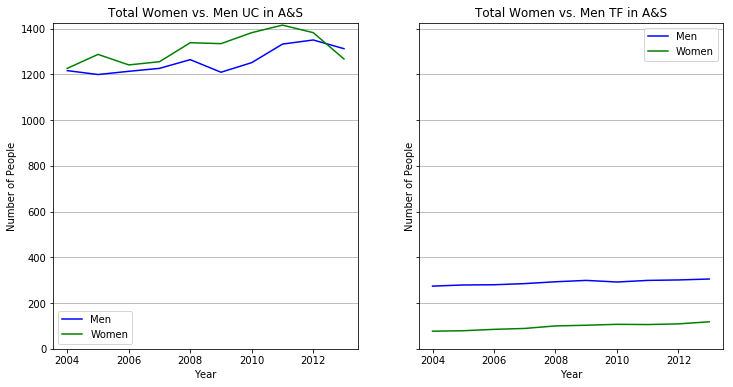

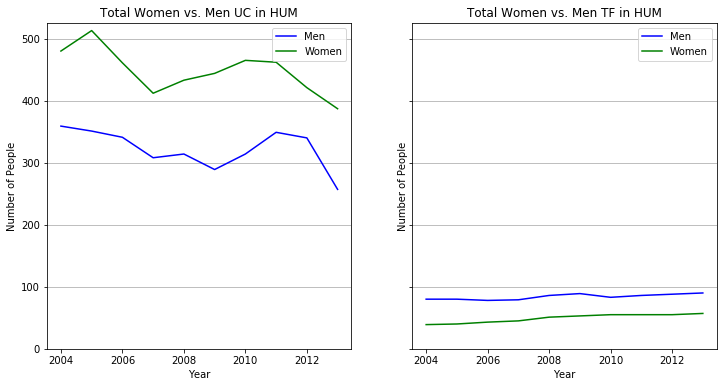

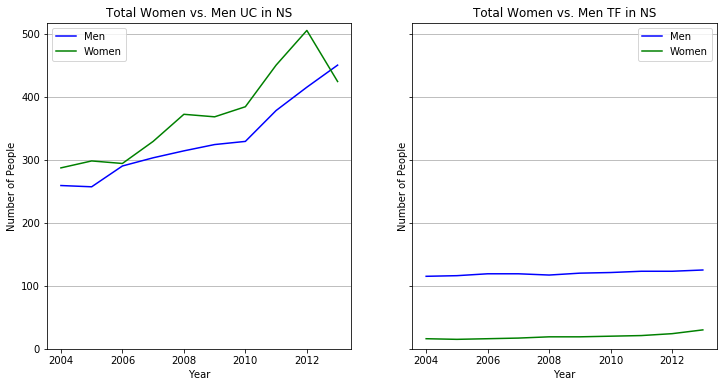

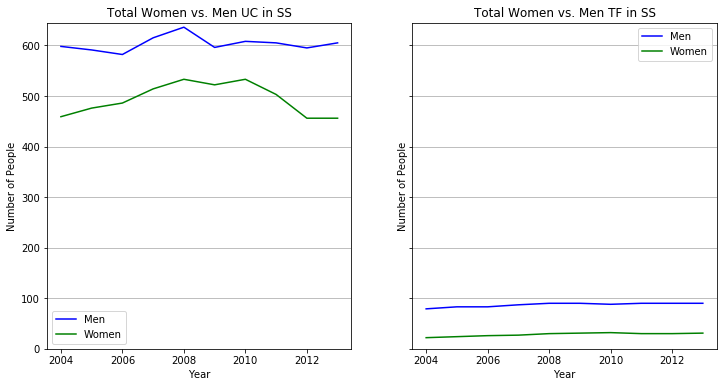

In [15]:
for a in range(len(areas)):
    fig, ax_lst = plt.subplots(1, 2, figsize=(12,6), sharey=True)
    for r in range(2):
        plotLines(ax_lst[r], a, r*3)

The gaps in representation are incredible. How can we more effectively emphasize this?

## You-Draw-It

Let's try a you-draw-it interactive. Since there are two lines, to simplify the user experience in a you-draw-it, let's only plot one line: percent female. Let's graph the before (UC) and after's (TF) for our four proposed you-draw-it's.

In [16]:
def plotFemalePercentLine(plot, area, rank, abbreviate=True):    
    labelIndex = 1 if abbreviate else 0
    plot.set_title('{} by Gender in {}'.format(ranks[rank][labelIndex], areas[area][labelIndex]))
    table = requestTable(area, rank)
    percents = table['Women'] / (table['Women'] + table['Men'])
    plot.plot(table['Year'], percents, linestyle='', marker='', color='black')
    plot.set_xlabel('Year')
    plot.set_ylabel('Percent of People')
    
    plot.axis(ymin=0, ymax=1)
    plot.axhline(y=0.5, linestyle='--', color='#aaaaaa')
    
    plot.fill_between(table['Year'], percents, 0, facecolor='g', interpolate=True)
    plot.fill_between(table['Year'], 1, percents, facecolor='b', interpolate=True)

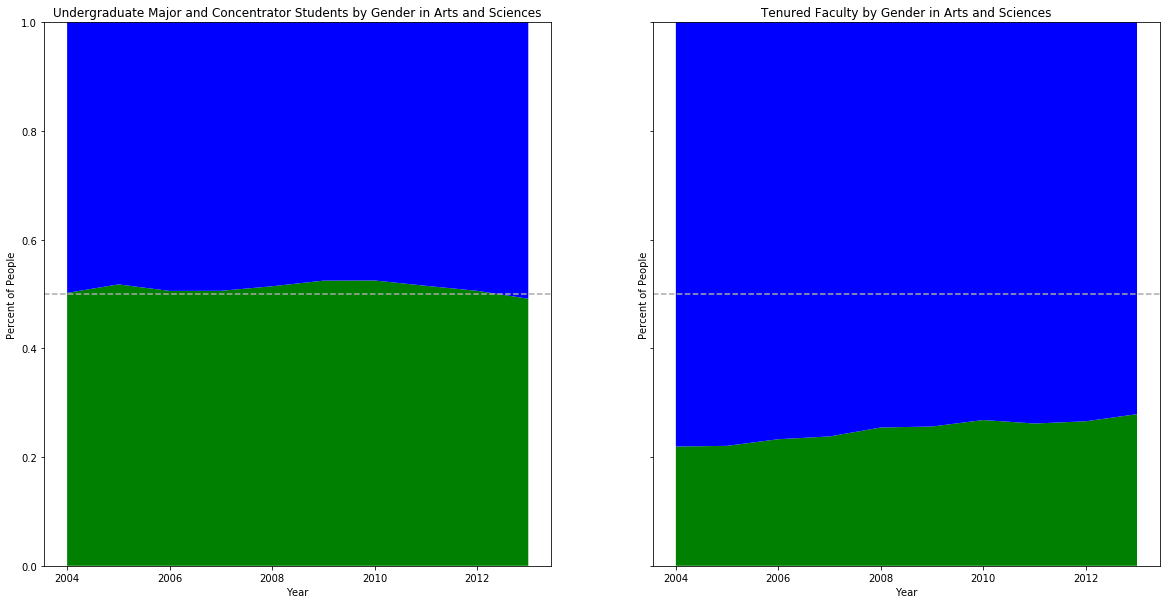

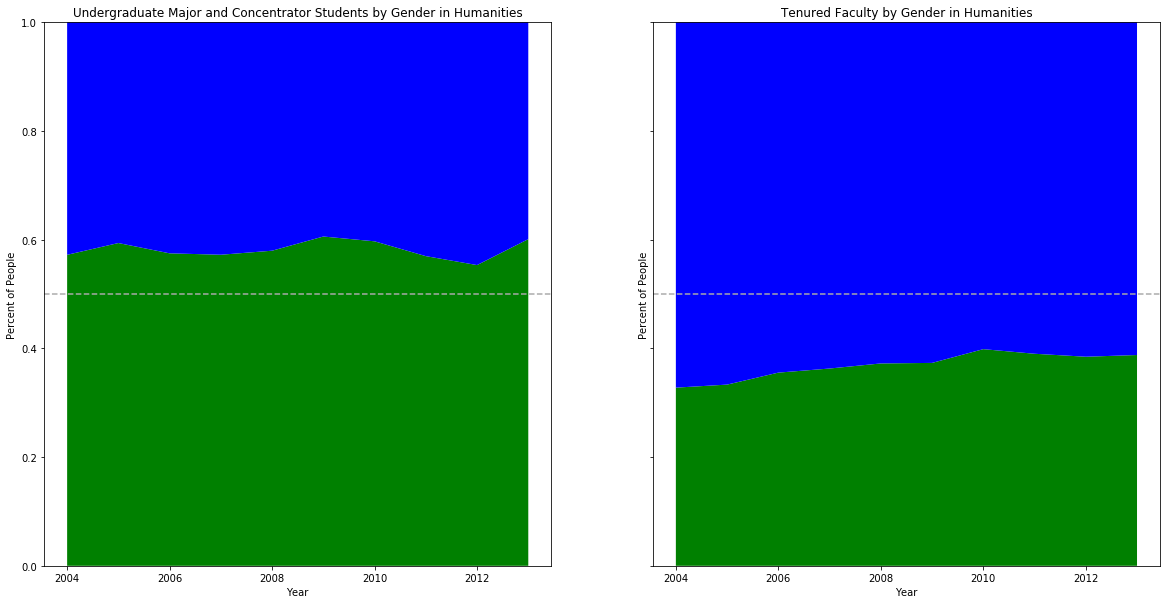

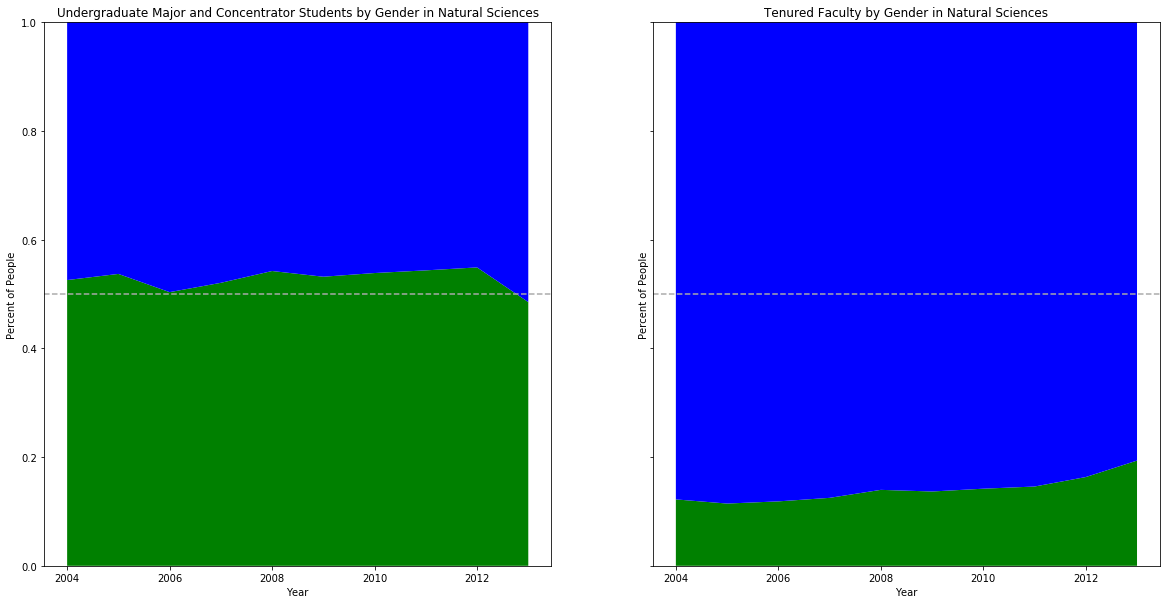

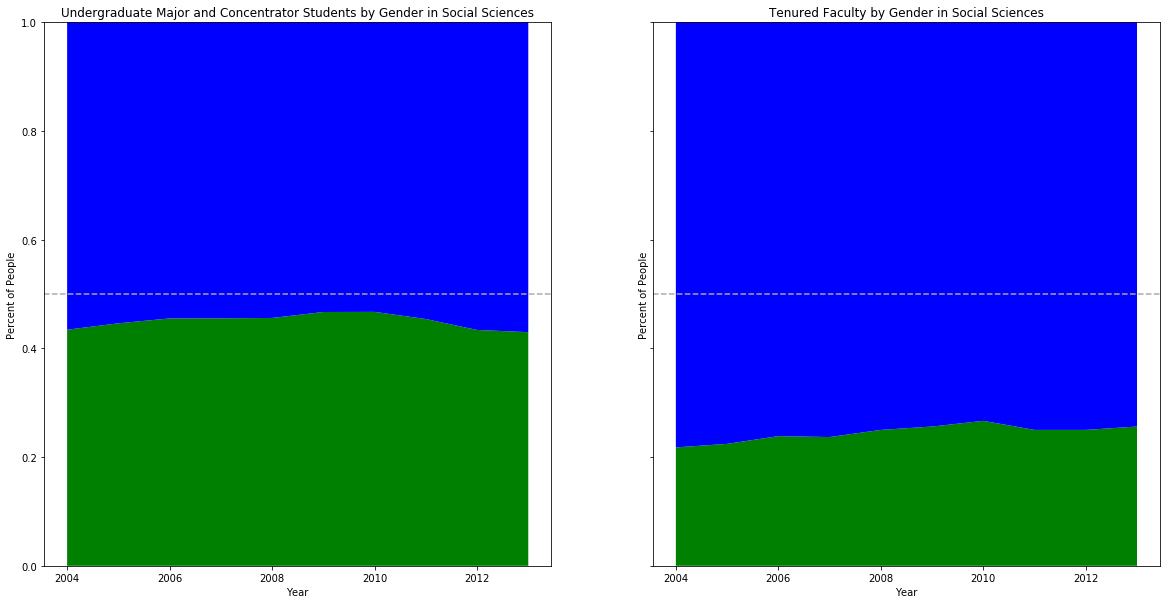

In [17]:
for a in range(len(areas)):
    fig, ax_lst = plt.subplots(1, 2, figsize=(20,10), sharey=True)
    for r in range(2):
        plotFemalePercentLine(ax_lst[r], a, r*3, abbreviate=False)

These are all drastic UC to TF transitions, and they are all appropriate for you-draw-it's.

What happens when, instead of graphing UC and TF side-by-side, we graph then on top of each other?

In [29]:
def plotPercentLines(plot, area, abbreviate=True):
    labelIndex = 1 if abbreviate else 0
    plot.set_title('{} and {} by Gender in {}'.format(ranks[0][labelIndex], ranks[3][labelIndex], areas[area][labelIndex]))
    plotOptions = []
    for r in range(2):
        table = requestTable(area, r*3)
        plotOptions.append({
            'years': table['Year'],
            'percents': table['Women'] / (table['Women'] + table['Men']),
            'color': ['b', 'm'][r],
            'label': ranks[r*3][labelIndex],            
        })
    for opt in plotOptions:
        plot.plot(opt['years'], opt['percents'], linestyle='-', marker='', color=opt['color'], label=opt['label'])
        
    plot.set_xlabel('Year')
    plot.set_ylabel('Percent of People')
    plot.legend()
    
    plot.axis(ymin=0, ymax=1)
    plot.axhline(y=0.5, linestyle='--', color='#aaaaaa')

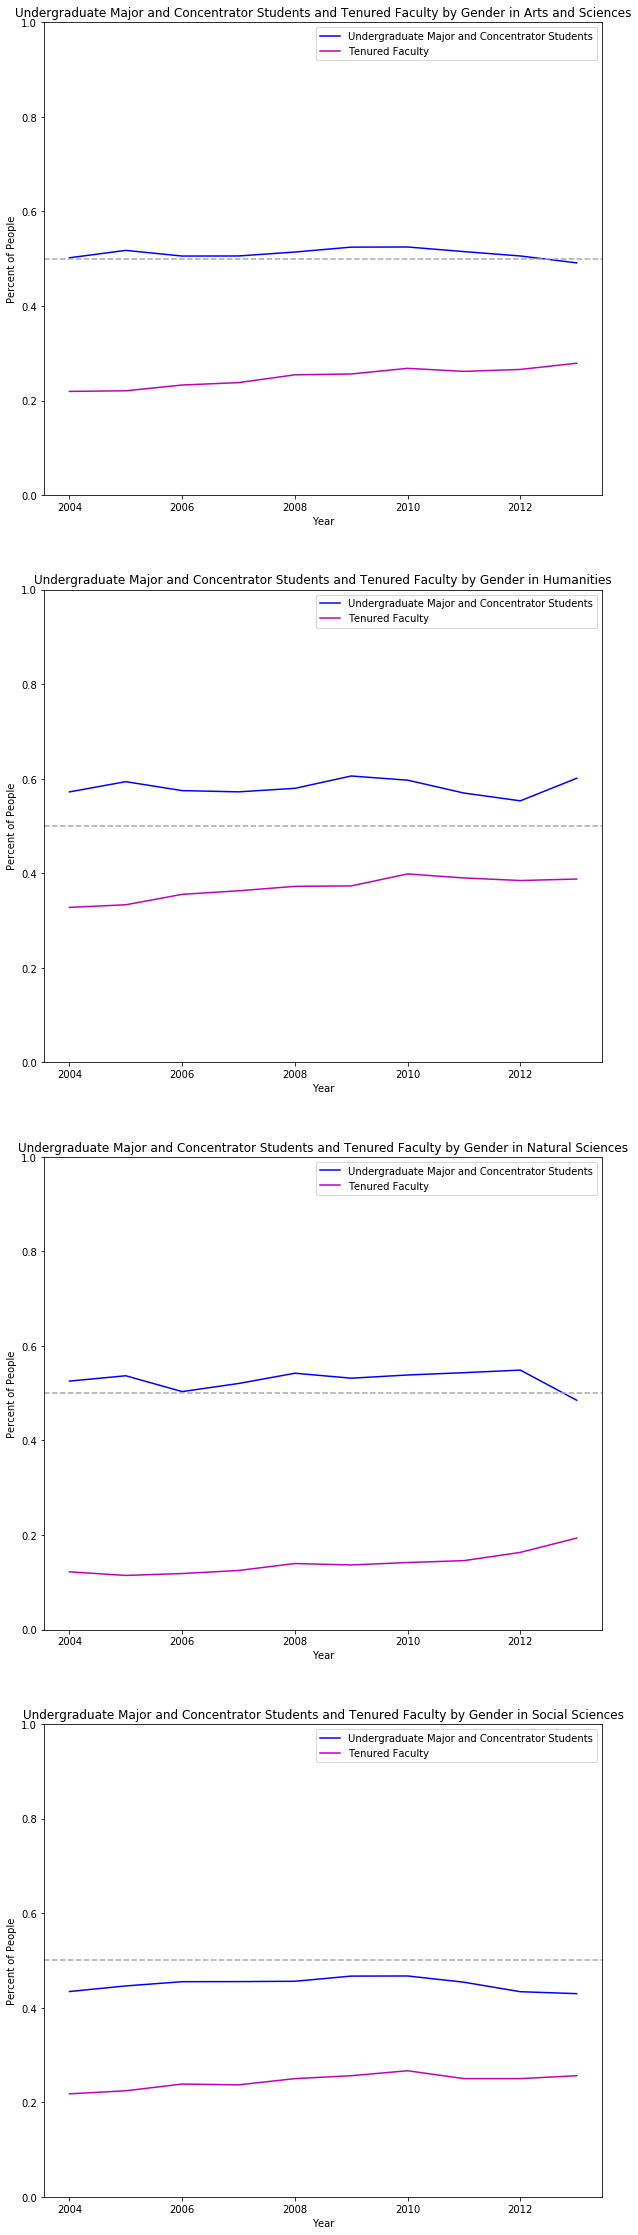

In [31]:
fig, ax_lst = plt.subplots(4, 1, figsize=(10,40), sharey=True)
for a in range(len(areas)):
    plotPercentLines(ax_lst[a], a, abbreviate=False)

I like this better—a you-draw-it for TF on top of UC. **(Note to self: This will be the interactive graphic.)**

A few notes for the actual implementation:
- Label the `y=0.5` as the equality line ("Equal Number of Men and Women")
- Use a light-colored `fill_between` for the UC graph that the TF line will then overlay. Label the two sides "Women" and "Men".